MoGPL project by Latifa LECHLECH


import libaries

In [ ]:
pip install igraph

In [ ]:
pip install cairocffi

In [ ]:
pip install pycairo 

In [4]:
import numpy as np
import pandas as pd
import igraph as ig
from igraph import *

In [6]:
class Graph:
    # Orienterd Graph (graphe orienté pondéré)
    def __init__(self,V):
        # Vertex (sommets) 
        self.V = V
        # Initilalize the 
        self.adj_matrix = np.array([[0]*V for _ in range(V)])

        self.weight = np.array([[0]*V for _ in range(V)])

    def add_edges(self,v1, v2,weight):
        self.adj_matrix[v1][v2] = 1
        self.weight[v1][v2] = weight

    def adjacency_matrix(self):
        return self.adj_matrix     

In [2]:
class Shortest_path(Graph):
    def __init__(self,V):
        super().__init__(V)


    def ballman_Ford(self):
        pass

In [ ]:
def generate_graph(self):
        pass 

In [7]:
labels = ['A', 'B', 'C', 'D', 'E']

g = Graph(V=5)

g.add_edges(0,1,6)
g.add_edges(0,2,3)
g.add_edges(1,3,8)
g.add_edges(1,4,1)
g.add_edges(2,1,2)
g.add_edges(3,1,1)
g.add_edges(3,4,-5)  # g.add_edges(3,4,-5)
g.add_edges(4,2,2)

adjacency_matrix = g.adjacency_matrix() 
adjacency_matrix_df = pd.DataFrame(adjacency_matrix, columns=labels, index=labels)
print(adjacency_matrix_df)

weights = g.weight
weight_df = pd.DataFrame(weights, columns=labels, index=labels)
print(weight_df)

   A  B  C  D  E
A  0  1  1  0  0
B  0  0  0  1  1
C  0  1  0  0  0
D  0  1  0  0  1
E  0  0  1  0  0
   A  B  C  D  E
A  0  6  3  0  0
B  0  0  0  8  1
C  0  2  0  0  0
D  0  1  0  0 -5
E  0  0  2  0  0


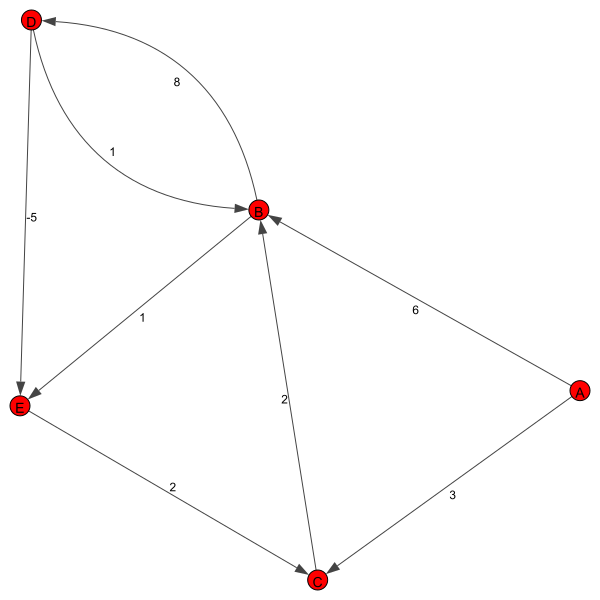

In [8]:
# Get the values as np.array, it's more convenenient.
A = adjacency_matrix_df.values
# Create graph, A.astype(bool).tolist() or (A / A).tolist() can also be used.
g_test = ig.Graph.Adjacency((A > 0).tolist())

# Add edge weights and node labels.
g_test.vs['label'] = labels
g_test.es["weight"] = g.weight.flatten()[g.weight.flatten() != 0].tolist()
layout = g_test.layout(layout='auto')
plot(g_test, layout=layout,edge_label=g_test.es["weight"])

In [9]:
def relax(g, d):
    # Find indices where value is equal to 1
    edges = np.where(adjacency_matrix == 1)
    edges = list(zip(edges[0], edges[1]))

    for i in range(1,g.V):
        print(i)
        # Relax        
        for edge in edges:
            u = edge[0]
            v = edge[1]
            d_2 = d[i-1,u,0] + g.weight[u,v]
            if d[i,v,0] > d_2:
                d[i,v,0] = d_2
                d[i,v,1] = u
        if np.array_equal(d[i-1],d[i]):
            print('true',i)
            return i,d
        i = i+ 1 
    return i,d

In [13]:
def ballman_Ford(g):
    # Initialization
    d = np.full((g.V,g.V,2), np.inf)  # d and node that it came from
    d[:,0,0] = np.zeros((g.V))

    i,d = relax(g, d)
    
    # Control if a negative cycle exist 
    #print(d)

    stop_node = g.V-1 # 4 
    path_list = [stop_node]
    current_node = stop_node
    for j in range(1,g.V-1):
        #print(i)
        #print(d[g.V-i,current_node,1])
        previous_node = int(d[g.V-j,current_node,1])
        path_list = np.append(path_list,previous_node)
        current_node = previous_node
        
    path_list = np.flip(path_list)  
    return path_list,i

In [14]:
path_list,i  = ballman_Ford(g)
print("Number of iteration",i)
print("Shortest path",path_list)

1
2
3
4
true 4
Number of iteration 4
Shortest path [0 2 1 4]


----

In [15]:
# Define a function to color subtree edges
def color_subtree_edges(graph, root, subtree_vertices, color="red"):
    edges = []
    for v in subtree_vertices:
        edges.extend(graph.get_shortest_paths(root, to=v, output="epath")[0])

    visual_style = {}
    visual_style["edge_color"] = ["black" if e not in edges else color for e in range(len(graph.es))]
    return visual_style

In [16]:
# Define the root and subtree vertices
root_vertex = path_list[0]
subtree_verts = path_list[1:]  # Example subtree vertices


0
[2 1 4]


In [ ]:
layout = g_test.layout(layout='auto')
plot(g_test, layout=layout,edge_label=g_test.es["weight"])

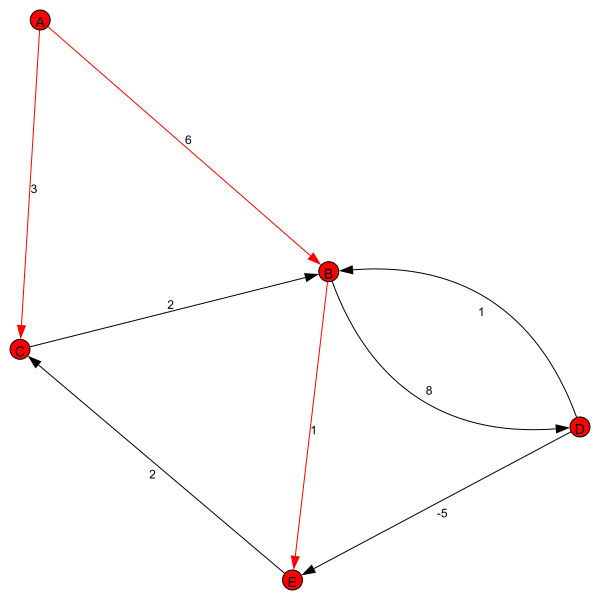

In [20]:

# Plot the graph with subtree edges colored
layout = g_test.layout(layout='auto')  # Set the layout
visual_style = color_subtree_edges(g_test, root_vertex, subtree_verts)
plot(g_test, layout=layout,edge_label=g_test.es["weight"], **visual_style)


----

In [ ]:
def ballman_Ford(g):
    # Initialization
    d = np.full((g.V,g.V,2), np.inf)  # d and node that it came from
    d[:,0,0] = np.zeros((g.V))

    # Find indices where value is equal to 1
    edges = np.where(adjacency_matrix == 1)
    edges = list(zip(edges[0], edges[1]))

    # 
    not_converge = True
    i = 1
    while(i < g.V & converge): # for i in range(1,g.V):
        #print(i)
        # Relax        
        for edge in edges:
            u = edge[0]
            v = edge[1]
            d_2 = d[i-1,u,0] + g.weight[u,v]
            if d[i,v,0] > d_2:
                d[i,v,0] = d_2
                d[i,v,1] = u
        if np.array_equal(d[i-1],d[i]):
            print("number of iteration = ",i)
            converge = False 
        i += 1

    # Control if a negative cycle exist 
    #print(d)

    stop_node = g.V-1 # 4 
    path_list = [stop_node]
    current_node = stop_node
    for i in range(1,g.V-1):
        #print(i)
        #print(d[g.V-i,current_node,1])
        previous_node = int(d[g.V-i,current_node,1])
        path_list = np.append(path_list,previous_node)
        current_node = previous_node
        
    path_list = np.flip(path_list)
    print(path_list) 
    return path_list,i 
    

In [ ]:
path_list,i  = ballman_Ford(g)
print("Number of iteration",i)
print("Shortest path",path_list)

Question 1 Coder l'algorithme Bellman-Ford comme ennoncé plus haut. L'algorithme renverra l'arborescence des plus courts chemins ainsi que le nombre  d'itérations qui ont été nécessaires avant que l'algorithme converge.

In [ ]:
path_list,i  = ballman_Ford(g)
print("Number of iteration",i)
print("Shortest path",path_list)

In [ ]:
# Initialization
d = np.full((g.V), np.inf)
d[0] = 0
print(d)
# Find indices where value is equal to 1
edges = np.where(adjacency_matrix == 1)
edges = list(zip(edges[0], edges[1]))

for i in range(g.V-1):
    # Relax        
    old_d = d.copy()
    for edge in edges:
        u = edge[0]
        v = edge[1]
        d_2 = d[u] + g.weight[u,v]
        if d[v] > d_2:
            d[v] = d_2
    print(d)
    #if np.array_equal(d,old_d):
    #    print("number of iteration = ",i)
    

# Control if a negative cycle exist 
#print(d)

In [ ]:
# Initialization
d = np.full((g.V,g.V,2), np.inf)  # d and node that it came from
d[:,0,0] = np.zeros((g.V))

# Find indices where value is equal to 1
edges = np.where(adjacency_matrix == 1)
edges = list(zip(edges[0], edges[1]))

for i in range(1,g.V):
    #print(i)
    # Relax        
    for edge in edges:
        u = edge[0]
        v = edge[1]
        d_2 = d[i-1,u,0] + g.weight[u,v]
        if d[i,v,0] > d_2:
            d[i,v,0] = d_2
            d[i,v,1] = u
    #if np.array_equal(d[i-1],d[i]):
    #    print("number of iteration = ",i)

# Control if a negative cycle exist 
#print(d)

stop_node = g.V-1 # 4 
path_list = [stop_node]
current_node = stop_node
for i in range(1,g.V-1):
    #print(i)
    #print(d[g.V-i,current_node,1])
    previous_node = int(d[g.V-i,current_node,1])
    path_list = np.append(path_list,previous_node)
    current_node = previous_node
    
path_list = np.flip(path_list)
print(path_list)   
    

----

In [ ]:
stop_node = 4 #is parameter in this case is g.V -1
current_node = stop_node
path_list = np.array([stop_node])

for i in range(1,g.V):
    previous_node =d[g.V-i,current_node,1]
    path_list.append(previous_node)
    current_node = previous_node

In [ ]:
stop_node = 4
path_list = np.array([stop_node])

for i in range(1,g.V):
    #np.insert(path_list,0,d[g.V-i,previous_node,1])
    print(d[g.V-i,previous_node,1])
    # np.append(path_list,d[g.V-i,previous_node,1])
    previous_node = d[g.V-i,previous_node,1]
    print(previous_node)

print(path_list)
   

[[ 0. inf inf inf inf]
 [ 0.  6.  3. inf inf]
 [ 0.  5.  3. 14.  7.]
 [ 0.  5.  3. 13.  6.]
 [ 0.  5.  3. 13.  6.]]

In [ ]:
# Initialization
d = np.full((g.V,g.V,2), np.nan)

d[0,:,0] = np.full((g.V), np.inf)
d[0,0,0] = 0
d

print(d)
# Find indices where value is equal to 1
edges = np.where(adjacency_matrix == 1)
edges = list(zip(edges[0], edges[1]))

for i in range(1,g.V-1):
    # Relax
    print(i)
    for edge in edges:
        u = edge[0]
        v = edge[1]
        d_2 = d[i-1,u,0] + g.weight[u,v]  
        if d[i-1,v,0] > d_2:  #check this again
            d[i,v,0] = d_2  # d[v]
            d[i,v,1] = u    # previous node of v (is u) that have the sortest path
    print(d[i])

# Control if a negative cycle exist 
print(d)

In [ ]:

for edge in edges:
    u = edge[0]
    v = edge[1]
    d_2 = d[u] + g.weight[u,v]
    if d[v] > d_2:
        print("A negative cycle exist")
    else:
        print(d)   


""" 
    if (old_d == d ):

        return d,i 
return d,i
"""


[ 0. inf inf inf inf]
[ 0.  5.  3. 14.  7.]
[ 0.  5.  3. 13.  6.]
number of iteration =  2
[ 0.  5.  3. 13.  6.]
number of iteration =  3
[ 0.  5.  3. 13.  6.]
[ 0.  5.  3. 13.  6.]
[ 0.  5.  3. 13.  6.]
[ 0.  5.  3. 13.  6.]
[ 0.  5.  3. 13.  6.]
[ 0.  5.  3. 13.  6.]
[ 0.  5.  3. 13.  6.]
[ 0.  5.  3. 13.  6.]
[ 0.  5.  3. 13.  6.]

----

To do: 
* Bellman Ford 

In [ ]:
def bellman_ford(g,w):
    # Initialization 
    # initialize the matrix values with + infinity 
    d = np.full((g.V,g.V), np.inf)
    # initialize the start node with zeros
    d[:,0] = np.zeros((g.V))

    for k in range(g.V):
        for u in range(g.V):
            v_list = np.where(g.adj_matrix[:,u] == 1) 
            
            d[k+1,u] = min(d[k,u],min(d[k,v]+g.weight(u,v)))
           

In [ ]:
def initialize(g):
    # initialize the matrix values with + infinity 
    matrix = np.full((g.V,g.V), np.inf)
    # initialize the start node with zeros
    matrix[:,0] = np.zeros((g.V))
    return matrix

In [ ]:
def relax(u,v,d):
    # if the distance of u + w(u,v) is less then the distance of v
    if d[v] > d[u] + g.weight [u,v]:
        d[v] = d[u] + g.weight [u,v]
        #pi[v] = u

In [ ]:
def bellman_ford(g,w):
    d = initialize(g)
    for u in range(g.V):
        v_list = np.where(g.adj_matrix[:,u] == 1)
        for v in v_list:
            relax(u,v,d)
        

In [ ]:
for i in range(1,g.V):
    print(i)
    # for each edge
    relax(u,v)
# for each edge
# if d[v] > d[w] + g.w(u,v)
# 


The number of iterations in the Bellman-Ford algorithm is primarily determined by the number of vertices in the graph and the existence of negative-weight cycles. The algorithm guarantees convergence after V-1 iterations where V is the number of vertices in the graph, assuming there are no negative-weight cycles reachable from the source vertex.

However, in some cases, the algorithm may converge in fewer than V-1 iterations:

Early termination: If the algorithm has converged, meaning no distance value is updated in a particular iteration, it can terminate before completing all V-1 iterations.

Optimizations: For certain graph structures or specific inputs, the algorithm might converge earlier due to optimizations or the absence of edges that trigger updates.

Sparse graphs: In a sparse graph (a graph with relatively few edges compared to the number of vertices), there might be fewer updates in each iteration, potentially leading to fewer total iterations required for convergence.